In [1]:
import matplotlib.pyplot as pl
import numpy as np
import random

In [2]:
import sys
sys.path.append('../../')

# Test Majority Error
Majority Error is error when only the majority label is guessed.

In [17]:
run ../purity_metrics.py

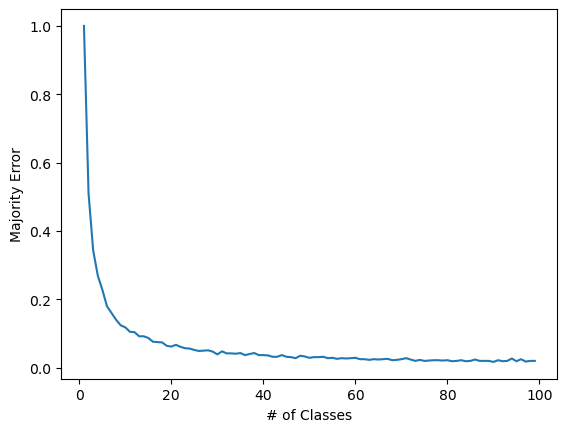

In [26]:
def test_majority_error(test_size=1000):
    
    classes = np.arange(100)
    
    def gen_labels(classes):
        y = []
        for i in range(test_size):
            y.append(random.choice(classes))
        return y
    
    data = []
    
    for i in range(1, len(classes)):
        y = gen_labels(classes[:i])
        data.append([i, majority_error(y)])
    
    data = np.array(data).T
    pl.plot(data[0], data[1])
    pl.xlabel('# of Classes')
    pl.ylabel('Majority Error')

test_majority_error()

# Test Gini Index

# Run ID3 on car-4 dataset 

In [3]:
import pandas as pd

In [4]:
cat ../../data/car-4/data-desc.txt

| label values

unacc, acc, good, vgood

| attributes

buying:   vhigh, high, med, low.
maint:    vhigh, high, med, low.
doors:    2, 3, 4, 5more.
persons:  2, 4, more.
lug_boot: small, med, big.
safety:   low, med, high.

| columns
buying,maint,doors,persons,lug_boot,safety,label


In [5]:
train = pd.read_csv(
    '../../data/car-4/train.csv',
    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']
)
# train

In [6]:
run ../ID3.py

In [7]:
model = ID3(train, 'label', attribute_values={
    'buying':   ['vhigh', 'high', 'med', 'low'],
    'maint':    ['vhigh', 'high', 'med', 'low'],
    'doors':    ['2', '3', '4', '5more'],
    'persons':  ['2', '4', 'more'],
    'lug_boot': ['small', 'med', 'big'],
    'safety':   ['low', 'med', 'high']
})

In [8]:
# model

In [10]:
from ete3 import Tree#, NodeStyle, TreeStyle
t = Tree( "((a,b),c);" )

# Basic tree style
# ts = TreeStyle()
# ts.show_leaf_name = True

# # Draws nodes as small red spheres of diameter equal to 10 pixels
# nstyle = NodeStyle()
# nstyle["shape"] = "sphere"
# nstyle["size"] = 10
# nstyle["fgcolor"] = "darkred"

# # Gray dashed branch lines
# nstyle["hz_line_type"] = 1
# nstyle["hz_line_color"] = "#cccccc"

# # Applies the same static style to all nodes in the tree. Note that,
# # if "nstyle" is modified, changes will affect to all nodes
# for n in t.traverse():
#     n.set_style(nstyle)

t.show()#tree_style=ts)

ImportError: cannot import name 'QtGui' from 'PyQt5' (unknown location)

In [11]:
train[train.safety=='low']

buying  maint  doors persons lug_boot safety  label
4    vhigh    low      3       2      big    low  unacc
5     high   high      3       4      med    low  unacc
7    vhigh  vhigh  5more    more    small    low  unacc
9      med   high      4       2      med    low  unacc
13     med    med      3       4      med    low  unacc
..     ...    ...    ...     ...      ...    ...    ...
993   high  vhigh      2       4    small    low  unacc
994   high    med      3       2    small    low  unacc
995    low    med      2    more    small    low  unacc
996   high    low      4    more      med    low  unacc
999    med  vhigh      3    more      med    low  unacc

[329 rows x 7 columns]

In [84]:
def check_example(example, node):
    if type(node)==str:
        print(node, example['label'])
        assert(example['label']==node)
        return
    
    keys = list(node.keys())
    
    attribute = keys[0].split('=')[0]
    
    value = example[attribute]
    
    print(attribute+'='+value, example.label)
    check_example(example, node[attribute+'='+value])

for index, row in train.iterrows():
    print(index)
    check_example(row, model)

0
safety=med acc
lug_boot=big acc
doors=4 acc
maint=vhigh acc
persons=4 acc
buying=low acc
acc acc
1
safety=high vgood
maint=high vgood
doors=5more vgood
lug_boot=med vgood
persons=4 vgood
acc vgood


AssertionError: 

In [70]:
def check(df, node, depth=''):
    print(depth)
    if type(node)==str:
        if not np.all(df['label']==node):
            print(np.sum(df['label']==node), len(df['label']), np.unique(df['label']), node)
        return
    
    keys = list(node.keys())
    
    for key_value in keys:
        key, value = key_value.split('=')
        check(df[df[key]==value], node[key_value], depth=depth+'/'+key_value)

check(train, model)


/safety=low
/safety=med
/safety=med/lug_boot=small
/safety=med/lug_boot=small/buying=vhigh
/safety=med/lug_boot=small/buying=high
/safety=med/lug_boot=small/buying=med
/safety=med/lug_boot=small/buying=med/doors=2
6 7 ['acc' 'unacc'] unacc
/safety=med/lug_boot=small/buying=med/doors=3
3 4 ['acc' 'unacc'] unacc
/safety=med/lug_boot=small/buying=med/doors=4
5 8 ['acc' 'unacc'] unacc
/safety=med/lug_boot=small/buying=med/doors=5more
/safety=med/lug_boot=small/buying=med/doors=5more/maint=vhigh
/safety=med/lug_boot=small/buying=med/doors=5more/maint=high
/safety=med/lug_boot=small/buying=med/doors=5more/maint=med
1 2 ['acc' 'unacc'] acc
/safety=med/lug_boot=small/buying=med/doors=5more/maint=low
/safety=med/lug_boot=small/buying=med/doors=5more/maint=low/persons=2
/safety=med/lug_boot=small/buying=med/doors=5more/maint=low/persons=4
/safety=med/lug_boot=small/buying=med/doors=5more/maint=low/persons=more
/safety=med/lug_boot=small/buying=low
/safety=med/lug_boot=small/buying=low/doors=2
/